## Imports

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Lectura de datos

In [77]:
sensores_crudos = pd.read_csv('values.csv', sep=';')

# Exploración de datos

In [78]:
sensores_crudos.head()

,V real,V medido,angulo
0,0.0,2.671,-1.385198
1,0.0,2.675,-1.615950
2,0.0,2.672,-1.615950
3,0.0,2.669,-1.615727
4,0.0,2.674,-1.615727


In [79]:
cantidad_angulos = sensores_crudos["angulo"].unique().shape[0]
print("Cantidad de angulos: ", cantidad_angulos)

Cantidad de angulos:  1002


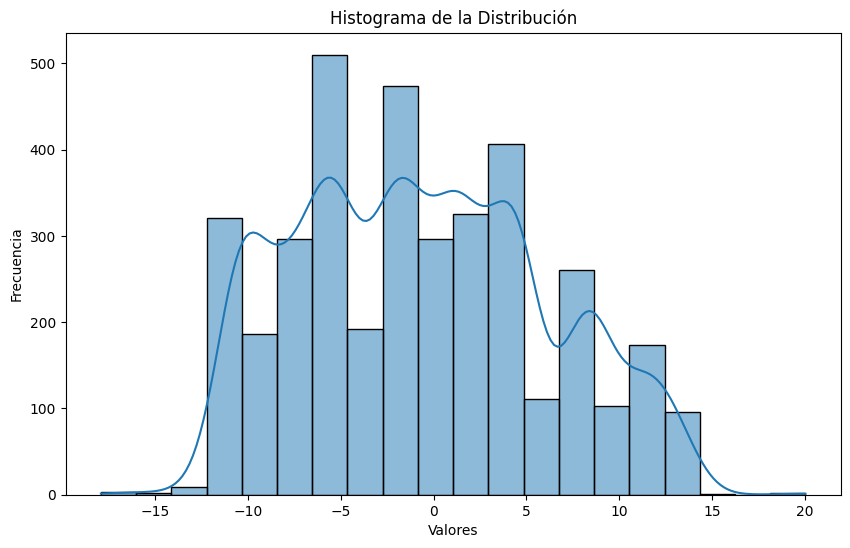

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(sensores_crudos["angulo"], bins=20, kde=True)
plt.title('Histograma de la Distribución')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Es bueno saber la cantidad de angulos distintos y su distribución, ya que nos puede dar un indicio de cual es el comportamiento de las carreteras. Como podemos ver en la gráfica, la distribución pareciera ser normal, el hecho de que los datos se hayan tomado a mano y no sean datos de los sensore de los camiones, puede ser la razón por la cual no se vea una distribución uniforme.

In [81]:
conteo_tuplas = sensores_crudos.groupby(['angulo','V real']).size().reset_index(name='conteo')
cantidad_original = sensores_crudos.shape[0]
sensores_crudos = sensores_crudos.groupby(['angulo','V real'])['V medido'].last().reset_index()
cantidad_final = sensores_crudos.shape[0]

print("Cantidad de datos originales: ", cantidad_original)
print("Cantidad de datos finales: ", cantidad_final)
print("Cantidad de datos eliminados: ", cantidad_original - cantidad_final)
print("Cantidad de tuplas repetidas: ", conteo_tuplas.shape[0])

Cantidad de datos originales:  3769
Cantidad de datos finales:  1291
Cantidad de datos eliminados:  2478
Cantidad de tuplas repetidas:  1291


Al mover el tanque para tomar las medidades de un nuevo angulo, se genera flujo, el cual queda registrado en los sensores. Por lo tanto se quitaron aquellas columnas que repetían Valor real y angulo, el dato que se dejo fuue el utlimo que se registro con esta tupla, ya que este sería el dato donde la gasolina ya se estabilizo.

In [82]:
min_angulo = sensores_crudos["angulo"].min()
max_angulo = sensores_crudos["angulo"].max()
sensores_crudos["angulo_normalized"] = (sensores_crudos["angulo"] - min_angulo) / (max_angulo - min_angulo)


scaler = StandardScaler()
sensores_crudos["angulo_normalized"] = scaler.fit_transform(sensores_crudos["angulo_normalized"].values.reshape(-1, 1))
sensores_crudos["V_medido_normalized"] = scaler.fit_transform(sensores_crudos["V medido"].values.reshape(-1, 1))

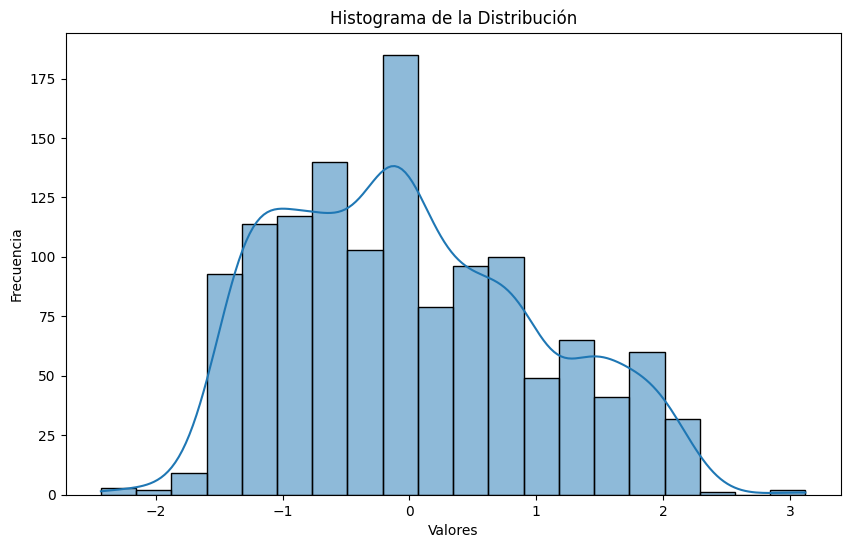

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(sensores_crudos["angulo_normalized"], bins=20, kde=True)
plt.title('Histograma de la Distribución')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Predicción del Modelo

In [84]:
X = sensores_crudos[['angulo_normalized','V_medido_normalized']]
y = sensores_crudos['V real']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [85]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.3067824003392418
R^2 Score: 0.9102162136183283
